# Bias

Let's talk about one of the most under-rated concepts of machine learning: Bias.

- [LinkedIn](https://www.linkedin.com/in/pro-programmer/)
- [YouTube](http://www.youtube.com/@itvaya)
- [gtihub](https://github.com/RishatTalukder/Machine-Learning-Zero-to-Hero)
- [Gmail](talukderrishat2@gmail.com)
- [discord](https://discord.gg/ZB495XggcF)

# What is Bias?

In machine learning, **bias** refers to the **error introduced by simplifying assumptions** made by a `model` to learn the relationship between inputs (`X`) and outputs (`y`).

> Bias measures how far the model’s average prediction is from the true function.

Bias helps us figure out if the problem is with the data or the model.

If you have a `High bias`, that means:

* The model is **too simple**
* It **cannot capture the underlying pattern**
* Even with infinite data, it would still be wrong

This leads to **underfitting**.

> Underfitting occurs when the model is too simple to store the pattern in the training data.

So, high bias is `BAD`.

Imagine trying to predict house prices using only this rule:

> “Price = 10,000 × area”

there is no location, demand or other factors that would change the price of a house, which is fundamentally **biased**.

Even with millions of examples, this assumption is **fundamentally flawed**.

That is **bias**.


## Calculating Bias

Let's say you have a dataset that has the following form:

```
y = f(x) + noise
```
> `y` is the `true value` of the `target/output` variable, `x` is the `input variable`, and `noise` is the error term.

Your model learns:

```
ŷ = g(x)
```

Bias measures:

```
Bias(x) = E[g(x)] − f(x)
```

> `E[g(x)]` is the expected value of the `model output` given the `input variable` `x`.

If `g(x)` is structurally incapable of approximating `f(x)`, bias will be `large`.

# Example 1: High Bias with Linear Regression

## Non-linear relationship

In [5]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
X = np.linspace(-3, 3, 100)
y = X**2 + np.random.normal(0, 0.5, size=(100))

import pandas as pd
df = pd.DataFrame({"x": X, "y": y})

In [6]:
df.head()

,x,y
0,-3.000000,9.882026
1,-2.939394,8.840115
2,-2.878788,8.776789
3,-2.818182,9.062595
4,-2.757576,8.538003


Here I made avery simple data set with one thing in mind. The relation between the `x` and `y` is non-linear. 

`y = x²` (non-linear)

Now let's see what happens when we try to fit a linear model to this data and then evaluate with the `training` data again.

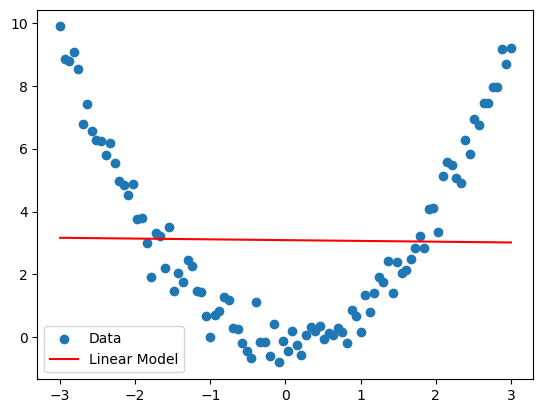

In [12]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
X, y = df[['x']], df['y'] 
model.fit(X, y)
y_pred = model.predict(X)

plt.scatter(X, y, label="Data")
plt.plot(X, y_pred, color="red", label="Linear Model")
plt.legend()
plt.show()

So, as we can see.

* The model **cannot curve**
* Errors are large everywhere
* Training error is high
* Test error will also be high

This is what happens when you try to fit a linear model to a non-linear data. This is **high bias**.

No amount of extra data will fix this.

> Bias Is NOT About Data Size. High bias models fail even with infinite data.

So, we need to increase the complexity of our model.

# Increasing ModelComplexity Reduces Bias

### Polynomial Regression

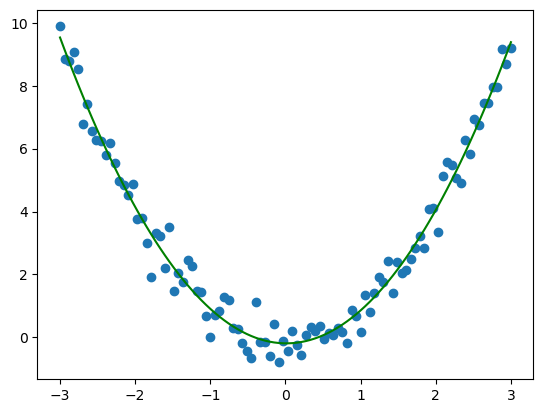

In [25]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

poly_model = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("lr", LinearRegression())
])

poly_model.fit(X, y)
y_poly_pred = poly_model.predict(X)

plt.scatter(X, y)
plt.plot(X, y_poly_pred, color="green")
plt.show()

Here, you can see,

* The curve matches data shape
* Bias reduced
* Training error drops significantly

Bias is reduced by **adding representational power**.

In the example above, I'm still using linear regression but what I did was:

* I added polynomial features and made a pipeline for it.

This is a topic for another day but what I mainly did was transform my feature into a polynomial form so that the model can learn a curve instead of a straight line.

> So, Complexity is the key to reduce bias.

> Bias in general means the model is not a good representation of reality.

**Common Causes of High Bias**

1. Model too simple

* Linear regression for complex data
* Shallow trees
* Few neurons / layers

2. Wrong assumptions

* Linearity assumption
* Independence assumption
* Gaussian error assumption

3. Over-regularization

> Regularization is the process of adding a penalty term to the loss function to prevent overfitting.

_Underfitting is the **symptom**_
_Bias is the **cause**_

| Term         | Meaning               |
| ------------ | --------------------- |
| Bias         | Structural limitation |
| Underfitting | Observed behavior     |


So, you might have this question in mind, **How to Detect High Bias?**

Very simple look for these signs:

* High training error
* High validation error
* Training and validation curves close together
* Predictions overly smooth

So, **How to practically reduce bias?**

- Increase model complexity
- Add better features
- Reduced regularization


> I'll talk more about regularization in a leter article.

# Final Words

Always test the model on the training data to look for bias then test it on the test data to see the performance on unseen data. Next Imma talka 'bout `bias-variance tradeoff` and how to know if a model is the best for your dataset.